In [36]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## 1. Frequency of Accidents Overtime
- What is the total number of accidents recorded in the dataset?
- How are accidents distributed over different years, months, days of the week, and hours
of the day?
- Are there observable trends or patterns in accident occurrences over time?

In [ ]:
# read the csv file and get the file discriminator through pandas
dataframe = pd.read_csv("road_accident_dataset.csv")

In [15]:
# get the total number of rows x cols in the dataset
dataframe.shape
accidents_recorded = dataframe.shape[0]
print(f"total number of accidents: {accidents_recorded}")

total number of accidents: 307973


In [ ]:
# shows the information about the given dataset
dataframe.info()

In [16]:
# handling null values, if they exist
dataframe.isnull().sum()
dataframe.dropna(inplace=True)

In [19]:
# extract date components from the Accident Date, and store them into respective columns
dataframe["Accident Date"] = pd.to_datetime(dataframe["Accident Date"])
dataframe["year"] = dataframe["Accident Date"].dt.year
dataframe["month"] = dataframe["Accident Date"].dt.month
dataframe["day_of_week"] = dataframe["Accident Date"].dt.day_name()
dataframe["hour"] = dataframe["Accident Date"].dt.hour

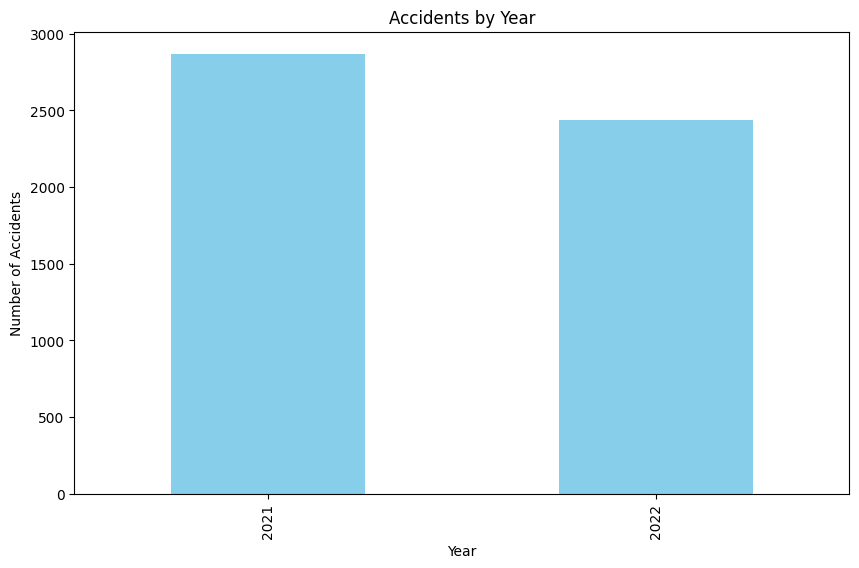

In [21]:
# plotting the accidents overtime, with respect to year
plt.figure(figsize=(10, 6))
dataframe['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

## 2. Geographical Distribution
- Which locations (e.g., cities, intersections, road segments) have the highest frequency
of accidents?
- How are accidents distributed across various regions or zones?
- Are there specific hotspots with a notably high incidence of accidents?

In [27]:
print(f"Highest frequency of accidents in: \n{dataframe["Local_Authority_(District)"].value_counts().head(10)}") 

Highest frequency of accidents in: 
Local_Authority_(District)
Cornwall                    54
County Durham               53
Leeds                       52
Birmingham                  51
Wiltshire                   46
Northumberland              42
Aberdeenshire               39
East Riding of Yorkshire    39
Swale                       36
Powys                       34
Name: count, dtype: int64


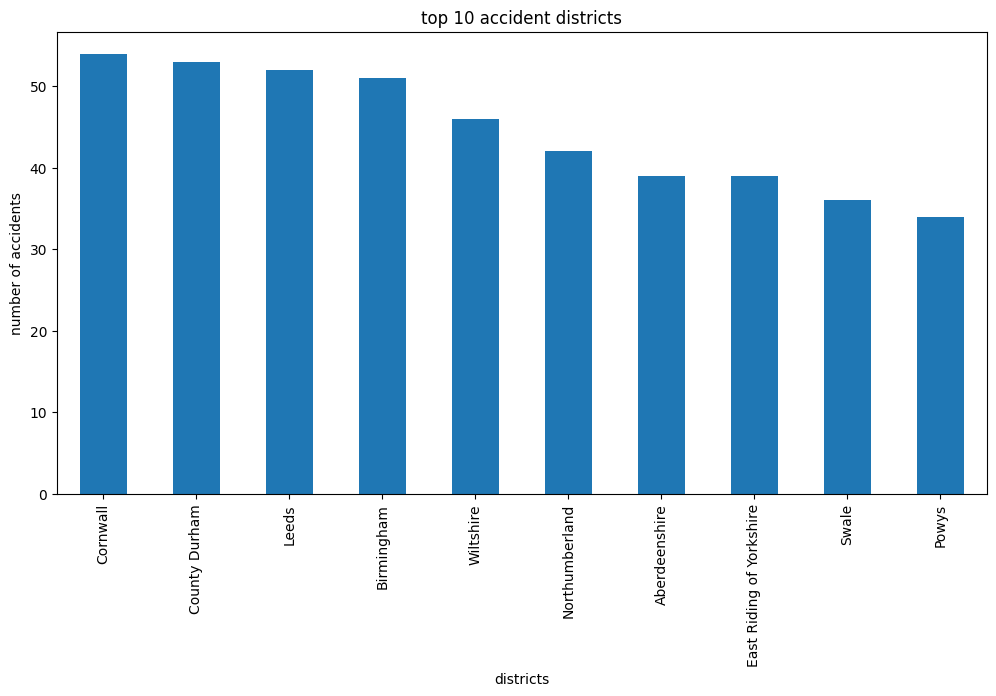

In [32]:
plt.figure(figsize=(12, 6))
dataframe["Local_Authority_(District)"].value_counts().head(10).plot(kind='bar')
plt.title("top 10 accident districts")
plt.xlabel("districts")
plt.ylabel("number of accidents")
plt.show()

## 3. Accident Severity Analysis
- What is the distribution of accident severities (e.g., fatal, serious, minor)?
- What percentage of accidents resulted in fatalities or serious injuries?
- Is there a correlation between accident severity and other factors like time of day or
location?

In [31]:
print(f"Accident severity distribution: \n{dataframe["Accident_Severity"].value_counts()}")

Accident severity distribution: 
Accident_Severity
Slight     4461
Serious     771
Fatal        73
Name: count, dtype: int64


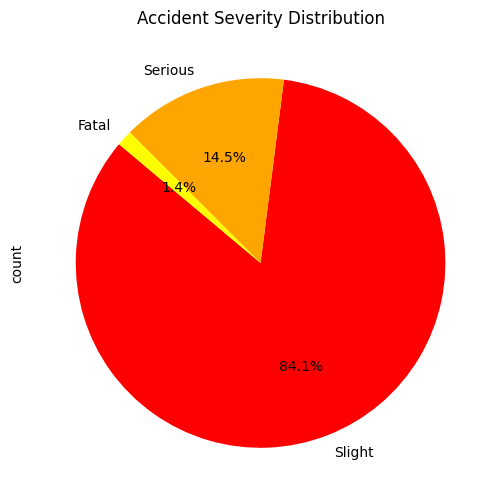

In [33]:
plt.figure(figsize=(8, 6))
dataframe["Accident_Severity"].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'orange', 'yellow'], startangle=140)
plt.title('Accident Severity Distribution')
plt.show()
